# Keras starter kit

## Elements needed for a neural network

### Library

In [32]:
# library to submit the model to Keras
from keras.models import Model

# The input layer and a fully connected layer (traditional neural network) architecture
from keras.layers import Input, Dense

# Plotting functions
import matplotlib.pyplot as plt
%matplotlib inline

### Components for the model specification

In [4]:
# Input() Every network starts with one or more inputs: the predictors.
# shape=(n,) specifies the shape of the predictors. (n,) meaning: there are n predictors.
# shape-(m,n) can be: there are n predictors with m timesteps: the input PER OBSERVATION is a matrix. 
# note 1: the batch dimension/ the number of observations is implicite.
# note 2: the input layer does not compute/learn anything:it has no weights associated with it. 

input1 = Input(shape=(10,)) # The Input (capital) is set to input1. This is the name of the 'tensor' or network element. 

# Dense(p,activation='') specifies a hidden layer with p nodes. 
# Dense(p, activation='')(prev) specifies that the layer called 'prev' goes into that layer. 

# note on activations used in the hidden layers:
# tanh outputs -1,1     is not very good with scaling to unnormalized input, but is smooth
# relu outputs 0, inf   is good at scaling to unnormalized input 

x = Dense(10, activation='tanh')(input1)

x = Dense(5,activation='tanh')(x)  # the tensor X is reused. 

# Finally, the output will be named uniquely so there's no confusion on what will be predicted
# note that the number of hidden nodes needs to correspond to the number of targets you are trying to estimate.

# note on activations used in the hidden layers:
# softmax all outputs sum up to 1
# sigmoid outputs between 0,1 (implicit negative category as 1-sigmoid) 
# linear regression type output. Scales to -inf,inf

prediction = Dense(1,activation='sigmoid')(x)

# The full code with different names to it is clear what are variabel and what not:
# network has 10 predictors,
# network has 2 hidden layers, respectively with 8 and 5 nodes 
# network predicts 2 target variables.

tralala_1 = Input(shape=(10,))  
tralala_2 = Dense(8, activation='tanh')(tralala_1)
tralala_2 = Dense(5, activation='tanh')(tralala_2)
tralala_3 = Dense(2, activation='sigmoid')(tralala_2)

### Letting Keras know what the total model is

In [6]:

# 'model_1' is the given name of the model that starts with input1 and ends with prediction. 
model_1 = Model(input=input1, output=prediction)

# model needs to be compiled. A loss function and an optimizer are required.
model_1.compile(loss='binary_crossentropy', optimizer ='adam')

# common choices for loss functions are:

#binary_crossentropy        target is binary (classification)
#categorical_crossentropy   target has multiply categories 
#mean_squared_error         target is continuous (regression)

# common choices for optimizers are:

# SGD      'vanilla' optimizer
#RMSprop    suggested to work well with recurrent networks
#Adam       optimizer that optimizes its own learning rate

# model summary specifies the resulting architecture. Count the parameters to understand the model
model_1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 10)            0                                            
____________________________________________________________________________________________________
dense_7 (Dense)                  (None, 10)            110         input_3[0][0]                    
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 5)             55          dense_7[0][0]                    
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 1)             6           dense_8[0][0]                    
Total params: 171
_________________________________________________________________________

In [ ]:
'''
hint for parameter counting:

For this example:
input1 = Input(shape=(10,))
x = Dense(10, activation='tanh')(input1)
x = Dense(5,activation='tanh')(x)  
prediction = Dense(1,activation='sigmoid')(x)


10 inputs to a layer with 10 hidden nodes:
weights: 10 x 10 = 100  
intercepts: 10 
total parameters: 100+10 = 110

10 hidden nodes to a layer with 5 hidden nodes:
weights: 10 x 5 = 50 
intercepts: 5
total parameters: 50+5 = 55

5 hidden nodes to a layer with 1 output:
weights: 5 x 1 = 5 
intercepts: 1
total parameters: 5+1 = 6

Total number of parameters: 110 + 55 + 6 = 171
'''

### Fitting (estimating) the model

In [ ]:

# Specification of the fit.
# note: can't run yet as there's no data specified. 

model_1.fit(train_x,train_y,                         # predictor and target specification 
            validation_data=(test_x, test_y),        # specification of the validation set
            nb_epoch=500,                            # number of iterations
            verbose=0)                               # 0: no logging, 1: progress bar, 2: one log line per epoch

# A plot that displays the convergence curves after the fitting. 
# Note that the validation loss gives important clues on overfittingb
plt.plot(model_1.history.epoch, model_1.history.history['loss'], 'g--',
         model_1.history.epoch, model_1.history.history['val_loss'], 'b--',)
plt.legend(['train', 'test'], loc='upper left')

# the loss of the last iteration as convenience: 

print ("loss:",model_1.history.history['loss'][-1],"test loss:",model_1.history.history['val_loss'][-1])

### Predicting 

In [ ]:
# predicting is easy:

model_1.predict(newdata_with_same_x_format)

## My first network

In [29]:
#Generating some data:
import numpy as np

def data_gen1(digits):
    vfunc = np.vectorize(np.binary_repr)
    x = np.random.permutation(vfunc(range(2**digits),width=digits).repeat(1))
    x = np.array([list(x[i]) for i in range(x.shape[0])]).astype(int)
    y=np.sum(x,axis=1)%2
    return x,y

train_x, train_y = data_gen1(3)

for i in range(len(train_y)):
    print (train_x[i],train_y[i])

(array([1, 1, 1]), 1)
(array([1, 0, 1]), 0)
(array([0, 1, 0]), 1)
(array([0, 0, 0]), 0)
(array([1, 1, 0]), 0)
(array([0, 1, 1]), 0)
(array([0, 0, 1]), 1)
(array([1, 0, 0]), 1)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_9 (InputLayer)             (None, 3)             0                                            
____________________________________________________________________________________________________
dense_21 (Dense)                 (None, 5)             20          input_9[0][0]                    
____________________________________________________________________________________________________
dense_22 (Dense)                 (None, 1)             6           dense_21[0][0]                   
Total params: 26
____________________________________________________________________________________________________
('loss:', 0.00031040867906995118)


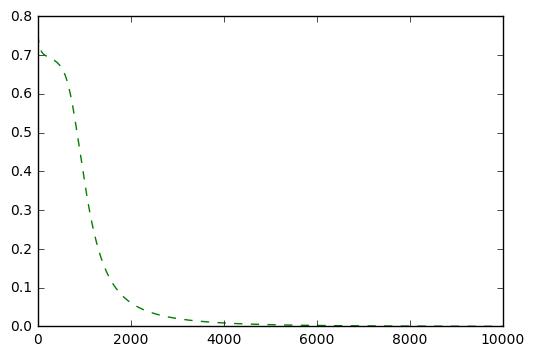

In [35]:
# Model:
input1 = Input(shape=(3,)) 
x = Dense(5,activation='tanh')(input1) 
prediction = Dense(1, activation='sigmoid')(x)

# Provide model to Keras
model_1 = Model(input=input1, output=prediction)
model_1.compile(loss='binary_crossentropy', optimizer ='adam')
model_1.summary()

# Fit
model_1.fit(train_x,train_y, nb_epoch=10000,verbose=0)  
plt.plot(model_1.history.epoch, model_1.history.history['loss'], 'g--')
print ("loss:",model_1.history.history['loss'][-1])

In [40]:
pred=model_1.predict(train_x)

for i in range(len(train_y)):
    print (train_y[i], round(pred[i],2))

(1, 1.0)
(0, 0.0)
(1, 1.0)
(0, 0.0)
(0, 0.0)
(0, 0.0)
(1, 1.0)
(1, 1.0)


### Splitting training and testing

In [43]:
test_x=train_x[4:]
test_y=train_y[4:]

train_x=train_x[:4]
train_y=train_y[:4]

print ("Train:")
for i in range(len(train_y)):
    print (train_x[i],train_y[i])

print ("Test:")
for i in range(len(test_y)):
    print (test_x[i],test_y[i])

Train:
(array([1, 1, 1]), 1)
(array([1, 0, 1]), 0)
(array([0, 1, 0]), 1)
(array([0, 0, 0]), 0)
Test:
(array([1, 1, 0]), 0)
(array([0, 1, 1]), 0)
(array([0, 0, 1]), 1)
(array([1, 0, 0]), 1)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_13 (InputLayer)            (None, 3)             0                                            
____________________________________________________________________________________________________
dense_29 (Dense)                 (None, 5)             20          input_13[0][0]                   
____________________________________________________________________________________________________
dense_30 (Dense)                 (None, 1)             6           dense_29[0][0]                   
Total params: 26
____________________________________________________________________________________________________
('loss:', 0.001352988532744348, 'test loss:', 6.4043788909912109)


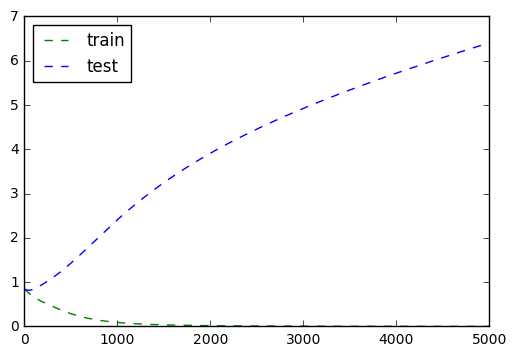

In [48]:
# Model:
input1 = Input(shape=(3,)) 
x = Dense(5,activation='tanh')(input1) 
prediction = Dense(1, activation='sigmoid')(x)

# Provide model to Keras
model_2 = Model(input=input1, output=prediction)
model_2.compile(loss='binary_crossentropy', optimizer ='adam')
model_2.summary()

# Fit
model_2.fit(train_x,train_y,validation_data=(test_x, test_y), nb_epoch=5000,verbose=0)  
plt.plot(model_2.history.epoch, model_2.history.history['loss'], 'g--',
         model_2.history.epoch, model_2.history.history['val_loss'], 'b--',)
plt.legend(['train', 'test'], loc='upper left')

print ("loss:",model_2.history.history['loss'][-1],"test loss:",model_2.history.history['val_loss'][-1])

In [49]:
pred=model_1.predict(train_x)
print ("train:")
for i in range(len(train_y)):
    print (train_y[i], round(pred[i],2))
    
    
pred=model_1.predict(test_x)
print ("test:")
for i in range(len(test_y)):
    print (test_y[i], round(pred[i],2))

train:
(1, 0.6)
(0, 0.3)
(1, 0.67)
(0, 0.43)
test:
(0, 0.53)
(0, 0.69)
(1, 0.43)
(1, 0.28)
